In [2]:
from matplotlib import animation
import matplotlib.pyplot as plt
import torch
import numpy as np
from sklearn import decomposition
# plt.rcParams.update({"font.size": 16})
# %config InlineBackend.figure_format="retina"

In [5]:
embedding_file = "cnnzoo2-usps-comvex-conv-embeddings"
data = torch.load("embedding_data/" + embedding_file + ".pt")
X = data["embeddings"].detach().numpy()
y = data["true_acc"].numpy()
y_pred = data["pred_acc"].detach().numpy()

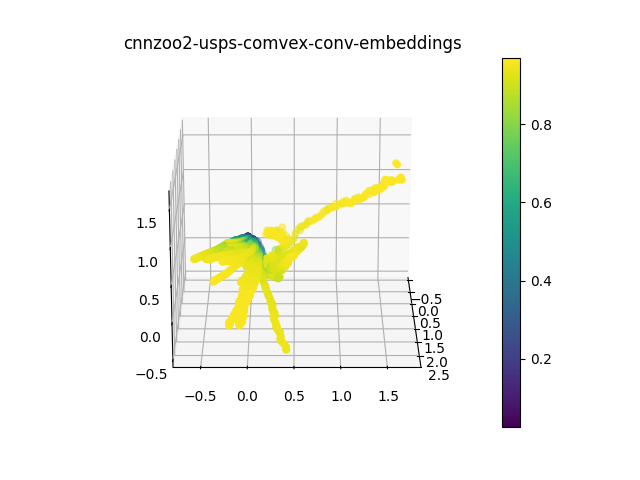

In [6]:
%matplotlib widget
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X_ = pca.transform(X)

fig = plt.figure(1) # , figsize=(12, 8)
plt.clf()
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)

def rotate(angle):
    ax.view_init(elev=20, azim=angle)

p = ax.scatter(X_[:, 0], X_[:, 1], X_[:, 2], c=y[:], cmap="viridis")
# ax.view_init(elev=-120, azim=20)
fig.colorbar(p)
plt.title(embedding_file)

rotation_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,365,5),interval=100)
rotation_animation.save("figures/" + embedding_file + ".gif", dpi=100, writer="pillow")
# plt.show()